#Creación de portafolios de Inversión 

#Librerias

In [ ]:
#Ejecutar pip en la primera ejecución
#!pip install yahoo-fin
#!pip install requests_html

from yahoo_fin import stock_info
import pandas as pd
from numpy import *
import time
import matplotlib.pyplot as plt


#Procesamiento de los Datos

In [ ]:
#Variables iniciales
fecha_inicio='2020-01-01'
fecha_final="2020-12-31"
precio_limite=100

#Carga empresas a evaluar
em= pd.read_csv('/content/Emisoras.csv')   #Actualizar Ruta del archivo
#em= pd.read_csv('/content/Emisoras_prueba.csv')   #Actualizar Ruta del archivo
em.head()

#Definición de emisoras 
lista_em=array(em['Emisora'])

#Función para obtener precios
def dataset(emisora,fe_ini,fe_fin):
  stock_info.get_quote_table(emisora)
  base= pd.DataFrame(stock_info.get_data(emisora,fe_ini,fe_fin))
  base=base.drop(labels=['close','open','high','volume','low','ticker'],axis=1,inplace=False)
  base.columns= [emisora]
  return base

#Datos de los precios de acción
def precios(lista_em,fecha_inicio,fecha_final):
  base= pd.DataFrame(stock_info.get_data(lista_em[0],fecha_inicio,fecha_final))
  base=base.drop(labels=['volume','high','open','low','adjclose','ticker'],axis=1,inplace=False) #,'open','volume'
  base.columns= [lista_em[0]]
  for le in lista_em[1:]:
    precio = dataset(le,fecha_inicio,fecha_final)
    base= pd.concat([base,precio[le]],axis=1,)
  return base.fillna(0)


In [ ]:
base=precios(lista_em,fecha_inicio,fecha_final)
print(base)
#base.to_csv('/content/volumen.csv')

                 AC.MX  AEROMEX.MX  ...        X.MX       XOM.MX
2020-01-02  101.930000      16.350  ...  202.755615  1315.222656
2020-01-03  102.839996      15.800  ...  202.445724  1325.171387
2020-01-06  102.455002      16.115  ...  205.144989  1435.104980
2020-01-07  103.419998      16.170  ...  210.443573  1313.232910
2020-01-08  103.080002      16.350  ...  208.454086  1300.299683
...                ...         ...  ...         ...          ...
2020-12-23   96.099998       7.440  ...  339.933350   836.700256
2020-12-24   95.900002       7.660  ...  334.983582   834.483765
2020-12-28   95.650002       7.640  ...  327.603912   835.701843
2020-12-29   97.029999       7.510  ...  328.983856   821.723572
2020-12-30   96.550003       7.580  ...  334.983582   827.714233

[251 rows x 97 columns]


#Rendimiento medio y Riesgo (Varianza)

In [ ]:
#Rendimientos diarios
rend=(base/base.shift(1))-1
#rend=rend.drop(labels=['UBER.MX','BYND.MX'],axis=1,inplace=False)
rend=rend.replace([inf,-inf],nan).dropna()
print(rend.mean())
rend.std()
met=pd.DataFrame({'Media':rend.mean(),'Riesgo':rend.std()},index=base.columns)
met.sort_values(by=['Media'],ascending=False)

AC.MX        -0.000126
AEROMEX.MX    0.001517
ALFAA.MX      0.001270
ALPEKA.MX     0.000630
ALSEA.MX      0.000800
                ...   
WFC.MX       -0.000301
WMT.MX        0.000696
WYNN.MX       0.001641
X.MX          0.003623
XOM.MX       -0.001516
Length: 97, dtype: float64


,Media,Riesgo
TSLA.MX,0.009483,0.046017
FCX.MX,0.006081,0.026556
VOLARA.MX,0.005026,0.031725
GMEXICOB.MX,0.004102,0.021039
CEMEXCPO.MX,0.004087,0.027590
...,...,...
BYND.MX,-0.001573,0.034710
HCITY.MX,-0.001921,0.024755
INTC.MX,-0.002016,0.024224
GILD.MX,-0.002644,0.017842


In [ ]:
def top(precios,n):
  rend=(base/base.shift(1))-1
  rend=rend.replace([inf,-inf],nan).dropna()
  met=pd.DataFrame({'Media':rend.mean(),'Riesgo':rend.std()},index=base.columns)
  met=met.sort_values(by=['Media'],ascending=False)
  return met.index[:n]

top(base,10)


Index(['TSLA.MX', 'FCX.MX', 'VOLARA.MX', 'GMEXICOB.MX', 'CEMEXCPO.MX',
       'PE&OLES.MX', 'BIDUN.MX', 'LACOMERUBC.MX', 'X.MX', 'AMD.MX'],
      dtype='object')

In [ ]:
from scipy.optimize import minimize

In [ ]:
#Rendimiento esperado del Portafolio anualizado
def ret_port(precios,pesos):
  return dot(precios.mean(),pesos) * 252

#Riesgo esperado del Portafolio anualizado
def ries_port(precios,pesos):
  return dot(pesos,dot(precios.cov()*252,pesos))**0.5

#Rendimiento Shape del portafolio, sin considerar instrumento libre de riesgo
def shape_port(precios, pesos):
  return ret_port(precios,pesos)/ries_port(precios,pesos)


In [ ]:
base.count()
rend.info
rend.cov()

,AC.MX,AEROMEX.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,AZTECACPO.MX,BACHOCOB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,CUERVO.MX,DANHOS13.MX,FEMSAUBD.MX,FIBRAMQ12.MX,FIBRAPL14.MX,FMTY14.MX,FUNO11.MX,GAPB.MX,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,GMEXICOB.MX,GRUMAB.MX,HCITY.MX,HERDEZ.MX,IENOVA.MX,KIMBERA.MX,LABB.MX,LACOMERUBC.MX,LIVEPOLC-1.MX,MEGACPO.MX,NEMAKA.MX,OMAB.MX,PE&OLES.MX,PINFRA.MX,Q.MX,...,BYND.MX,COST.MX,CRM.MX,CSCO.MX,CVS.MX,DAL.MX,DIS.MX,FB.MX,FCX.MX,GE.MX,GILD.MX,GOOGL.MX,INTC.MX,JNJ.MX,JPM.MX,KO.MX,MA.MX,MGM.MX,MSFT.MX,MU.MX,NFLX.MX,NKE.MX,NVDA.MX,PFE.MX,PG.MX,PYPL.MX,QCOM.MX,SBUX.MX,T.MX,TCEHYN.MX,TSLA.MX,TWTR.MX,UAL.MX,UBER.MX,V.MX,WFC.MX,WMT.MX,WYNN.MX,X.MX,XOM.MX
AC.MX,0.000237,0.000141,-0.000009,0.000019,0.000044,0.000028,0.000062,0.000006,0.000011,0.000066,0.000099,-6.627115e-07,0.000086,0.000076,0.000038,0.000056,0.000085,-0.000010,0.000025,0.000009,0.000074,0.000054,0.000104,0.000078,0.000133,0.000064,0.000056,0.000013,0.000047,0.000072,1.005753e-04,0.000020,4.344023e-05,0.000065,0.000065,-2.888530e-05,0.000073,0.000075,0.000086,-0.000008,...,-0.000107,-0.000014,-0.000042,-0.000007,-0.000037,-0.000010,-0.000012,0.000008,-0.000031,-0.000027,-0.000032,-3.727990e-06,-0.000101,-0.000014,-0.000010,0.000002,0.000015,-0.000025,-0.000023,-0.000087,-0.000026,0.000007,-0.000027,-0.000002,-4.139508e-06,0.000011,-0.000033,-0.000010,-0.000035,0.000018,-0.000081,-0.000050,-0.000021,-1.080288e-05,-0.000026,0.000035,-9.001550e-06,-1.000477e-05,-0.000081,-0.000024
AEROMEX.MX,0.000141,0.002102,0.000105,0.000055,0.000268,0.000093,0.000182,0.000420,0.000087,0.000113,-0.000007,7.971835e-05,0.000377,0.000104,-0.000083,0.000076,0.000203,0.000060,-0.000050,-0.000034,0.000181,0.000210,0.000206,0.000166,0.000137,0.000066,0.000006,0.000110,0.000102,0.000153,7.198016e-05,0.000028,8.854993e-05,0.000214,0.000065,4.783376e-07,0.000152,0.000147,0.000178,0.000054,...,-0.000102,-0.000073,-0.000215,0.000015,0.000104,0.000321,0.000033,-0.000171,0.000029,0.000225,-0.000056,-6.944943e-07,0.000069,-0.000006,0.000179,0.000093,0.000041,0.000248,-0.000062,0.000105,-0.000154,0.000054,-0.000048,0.000088,-7.923211e-05,-0.000167,0.000070,0.000021,0.000114,0.000016,0.000121,-0.000128,0.000262,-4.169454e-05,0.000139,0.000236,-7.395292e-05,3.006815e-04,0.000463,0.000152
ALFAA.MX,-0.000009,0.000105,0.001499,0.000148,-0.000035,0.000104,0.000126,0.000305,0.000039,0.000055,0.000111,7.031829e-05,0.000169,-0.000027,-0.000002,0.000106,0.000043,0.000029,0.000029,-0.000023,0.000080,0.000253,0.000077,0.000020,0.000078,0.000174,0.000085,0.000089,0.000105,0.000067,8.679475e-05,-0.000024,-2.852755e-07,0.000075,0.000040,2.285338e-04,0.000205,0.000209,0.000194,0.000059,...,0.000202,0.000050,0.000194,0.000089,0.000132,0.000200,0.000123,0.000162,0.000189,0.000112,0.000100,8.349416e-05,0.000123,0.000101,0.000119,0.000004,0.000096,0.000175,0.000207,0.000089,0.000018,0.000084,0.000124,0.000128,6.643580e-05,0.000115,0.000152,0.000102,0.000100,0.000067,-0.000028,0.000072,0.000158,1.313992e-04,0.000060,0.000118,8.744764e-05,2.179773e-04,0.000174,0.000239
ALPEKA.MX,0.000019,0.000055,0.000148,0.000296,0.000050,0.000070,0.000029,0.000111,0.000036,0.000107,0.000066,2.836094e-05,0.000091,0.000088,0.000016,0.000108,0.000039,0.000060,0.000037,0.000009,0.000078,0.000111,0.000089,0.000088,0.000095,0.000108,0.000029,0.000064,0.000075,0.000073,1.849902e-05,0.000020,5.908273e-05,0.000055,0.000049,4.851600e-05,0.000091,0.000164,0.000066,0.000040,...,0.000002,0.000031,-0.000020,0.000033,0.000013,0.000087,0.000036,0.000027,0.000056,0.000021,0.000040,3.565669e-05,0.000051,0.000042,0.000022,0.000006,0.000012,0.000108,0.000026,0.000024,0.000020,0.000025,0.000066,0.000049,-1.406283e-07,0.000041,0.000057,0.000044,0.000022,0.000010,0.000052,0.000014,0.000093,-9.377176e-06,0.000011,0.000056,4.227506e-05,4.800856e-05,0.000094,0.000026
ALSEA.MX,0.000044,0.000268,-0.000035,0.000050,0.000646,0.000109,0.000237,0.000122,0.000026,0.000162,0.000087,3.610471e-06,0.000054,0.000060,0.00

In [ ]:
Emisoras=rend.columns
Num_emi=len(Emisoras)
w=[1/Num_emi]*Num_emi
print(dot(rend.mean(),w))
print(ret_port(rend,w))
print(ries_port(rend,w))
shape_port(rend,w)

0.0014151714927527958
0.35662321617370457
0.13488815087148526


2.6438439097106277

#Primer análisis
Se emplea MonteCarlo para poder vizualizar los posibles rendimientos.

In [ ]:
#muestras
n=5000
def MonteCarlo(rend,n):
  w = random.random((n, Num_emi))
  w = (w.T / w.sum(axis=1)).T
  #Calculo de rendimiento y riesgo esperado
  rend_ries_port= [(ret_port(rend, pesos),ries_port(rend,pesos)) for pesos in w]
  rend_ries_port = array(rend_ries_port)
  #Calculo del Shape Ratio del portafolio
  shape_p=rend_ries_port[:,0]/rend_ries_port[:,1]
  return rend_ries_port,shape_p

rend_ries_port,shape_p = MonteCarlo(rend,n)


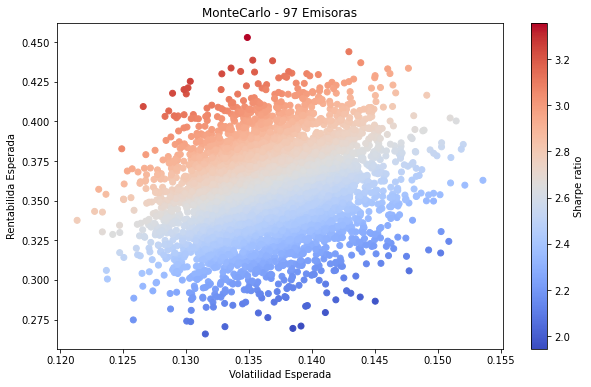

In [ ]:
def MC_grafica(rend_ries_port,shape_p,Num_emi):
  #Visualización de retabilidad y riesgos de portafolio
  plt.figure(figsize=(10, 6))
  fig = plt.scatter(rend_ries_port[:, 1], rend_ries_port[:, 0],c=shape_p, cmap='coolwarm')
  cb = plt.colorbar(fig)
  cb.set_label('Sharpe ratio')
  plt.xlabel('Volatilidad Esperada')
  plt.ylabel('Rentabilida Esperada')
  plt.title('MonteCarlo - %d Emisoras'%Num_emi)

MC_grafica(rend_ries_port,shape_p,Num_emi)

#Busqueda de la cartera con mínima varianza


In [ ]:
#Restricciones del modelo
cons = {'type': 'eq', 'fun': lambda phi: sum(phi) - 1}
#Restricción de pesos, valores positivos y menores que 1
lim=[(0,1)]*Num_emi
#Pesos óptimos
p_opt = minimize(lambda pesos: -shape_port(rend, pesos),
                  Num_emi* [1 / Num_emi],
                  bounds=lim,
                  constraints=cons)['x']
p_opt


array([7.58931823e-14, 2.48383593e-13, 3.88169910e-13, 2.74627399e-13,
       5.17337890e-13, 4.66179619e-13, 5.14107976e-14, 9.27834659e-14,
       1.42589710e-13, 1.58820889e-13, 8.08680397e-04, 8.52734320e-14,
       2.76941072e-03, 2.14854317e-13, 4.33452890e-02, 2.32246800e-13,
       6.10459388e-14, 1.21849645e-13, 3.93499919e-02, 1.84380317e-01,
       1.38909103e-13, 4.43636614e-14, 2.06095469e-13, 1.71298928e-13,
       1.45132646e-13, 5.76910225e-02, 5.10394269e-14, 4.27670267e-13,
       2.35258619e-14, 2.15046083e-13, 2.38997221e-13, 8.69502643e-14,
       1.95016962e-01, 1.36622979e-13, 1.53092515e-13, 5.15091058e-02,
       1.85672666e-13, 7.94925220e-03, 3.87785647e-13, 6.00987356e-02,
       1.91050386e-13, 7.38224026e-02, 1.66729446e-13, 7.49610252e-13,
       2.01062198e-13, 3.30075279e-13, 1.37288573e-13, 3.55890060e-02,
       1.37792321e-13, 8.92763733e-14, 1.55644745e-02, 3.57020036e-13,
       5.69638186e-14, 1.80252336e-12, 1.01406502e-13, 6.26162487e-02,
      

In [ ]:
#Emisoras y pesos del portafolio de inversión
list(zip(base.columns,p_opt))

[('AC.MX', 7.589318226938266e-14),
 ('AEROMEX.MX', 2.483835927861469e-13),
 ('ALFAA.MX', 3.8816991029680303e-13),
 ('ALPEKA.MX', 2.746273992927301e-13),
 ('ALSEA.MX', 5.173378899466783e-13),
 ('AMXL.MX', 4.661796188346318e-13),
 ('ASURB.MX', 5.1410797591347036e-14),
 ('AZTECACPO.MX', 9.27834658613807e-14),
 ('BACHOCOB.MX', 1.425897096678617e-13),
 ('BBAJIOO.MX', 1.5882088900545244e-13),
 ('BIMBOA.MX', 0.0008086803972959931),
 ('BOLSAA.MX', 8.527343196013972e-14),
 ('CEMEXCPO.MX', 0.0027694107203299614),
 ('CHDRAUIB.MX', 2.1485431670147606e-13),
 ('CUERVO.MX', 0.04334528900414067),
 ('DANHOS13.MX', 2.322467998796291e-13),
 ('FEMSAUBD.MX', 6.104593879659704e-14),
 ('FIBRAMQ12.MX', 1.2184964468965825e-13),
 ('FIBRAPL14.MX', 0.0393499918581291),
 ('FMTY14.MX', 0.18438031739050234),
 ('FUNO11.MX', 1.389091028593157e-13),
 ('GAPB.MX', 4.436366144434064e-14),
 ('GCARSOA1.MX', 2.060954687716193e-13),
 ('GFINBURO.MX', 1.7129892779327283e-13),
 ('GFNORTEO.MX', 1.4513264636091785e-13),
 ('GMEXICO

In [ ]:
print(ret_port(rend,p_opt))
print(ries_port(rend,p_opt))
print(shape_port(rend,p_opt))

0.8184387638615704
0.11077597954704452
7.388233145923071


#Valor real vs esperado

In [ ]:
#Precios de acciones actuales
Fecha_inicial='2021-01-01'
Fecha_final='2021-05-30'
pre_act=precios(Emisoras,Fecha_inicial,Fecha_final)
pre_act

,AC.MX,AEROMEX.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,AZTECACPO.MX,BACHOCOB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,CUERVO.MX,DANHOS13.MX,FEMSAUBD.MX,FIBRAMQ12.MX,FIBRAPL14.MX,FMTY14.MX,FUNO11.MX,GAPB.MX,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,GMEXICOB.MX,GRUMAB.MX,HCITY.MX,HERDEZ.MX,IENOVA.MX,KIMBERA.MX,LABB.MX,LACOMERUBC.MX,LIVEPOLC-1.MX,MEGACPO.MX,NEMAKA.MX,OMAB.MX,PE&OLES.MX,PINFRA.MX,Q.MX,...,BYND.MX,COST.MX,CRM.MX,CSCO.MX,CVS.MX,DAL.MX,DIS.MX,FB.MX,FCX.MX,GE.MX,GILD.MX,GOOGL.MX,INTC.MX,JNJ.MX,JPM.MX,KO.MX,MA.MX,MGM.MX,MSFT.MX,MU.MX,NFLX.MX,NKE.MX,NVDA.MX,PFE.MX,PG.MX,PYPL.MX,QCOM.MX,SBUX.MX,T.MX,TCEHYN.MX,TSLA.MX,TWTR.MX,UAL.MX,UBER.MX,V.MX,WFC.MX,WMT.MX,WYNN.MX,X.MX,XOM.MX
2021-01-04,93.910004,7.25,14.365610,17.786543,26.330000,14.78,329.399994,0.433,72.439056,24.780392,41.791973,46.019161,10.390000,28.929569,49.980000,24.277599,149.667450,27.676764,44.904736,11.129002,22.111731,213.275345,65.349998,20.820000,108.499992,86.287506,236.996170,5.64,58.950001,77.389999,32.419930,18.730000,46.193790,68.239021,71.072807,5.71,128.619995,382.250000,178.330002,104.679131,...,2486.000000,7574.203613,4355.000000,871.695190,1399.071045,770.200012,3541.149902,5383.509766,542.400208,208.982712,1148.240845,34446.601562,988.809448,3090.106689,2517.226318,1053.180054,7021.142090,592.496460,4344.931641,1479.030029,10439.900391,2782.349854,10476.210938,735.255249,2708.317139,4633.000000,2965.037354,2059.154297,585.006714,1428.00000,14600.500000,1087.050049,834.799988,1015.000000,4334.224609,596.532776,2910.843994,2135.000000,342.373230,827.215027
2021-01-05,95.970001,6.98,14.275763,17.995913,26.200001,14.85,331.709991,0.433,70.566658,24.761583,41.987038,46.066990,10.660000,28.279245,50.000000,24.383194,148.689301,26.911114,43.261883,11.224940,22.063047,212.843231,65.980003,20.230000,106.678833,88.378799,233.873123,5.85,55.009998,78.059998,32.619469,18.719999,44.402565,68.248802,71.343117,5.64,129.429993,381.500000,173.990005,104.091209,...,2530.000000,7503.467773,4408.569824,875.383911,1406.066406,789.820007,3548.370117,5384.160156,563.437866,214.992508,1188.737793,34446.601562,1001.062073,3148.061035,2504.280273,1039.191040,6919.154297,604.996399,4326.535645,1530.000000,10353.799805,2809.444824,10646.706055,741.249207,2738.298584,4657.000000,3023.539307,2064.162354,581.392822,1520.00000,14579.700195,1069.969971,860.049988,1066.000000,4265.085449,607.839783,2890.852051,2193.500000,364.622131,879.633606
2021-01-06,96.760002,7.18,14.305712,18.265104,26.559999,14.81,351.570007,0.447,71.814919,24.902647,41.860245,46.478302,11.550000,28.870447,49.950001,24.767181,147.950684,26.930019,43.477013,11.263316,22.793291,224.667313,66.870003,20.190001,108.295471,89.040230,232.202820,5.84,52.980000,78.739998,33.522129,19.639999,46.034573,68.806297,70.763878,5.63,135.009995,380.700012,170.470001,104.235779,...,2325.000000,7292.701172,4261.080078,873.894470,1424.584229,790.299988,3528.020020,5174.930176,594.934387,221.992264,1208.716553,33950.000000,1005.089722,3136.678223,2579.258545,990.009338,6939.152344,617.966309,4187.357910,1522.000000,9890.730469,2803.205811,9942.255859,724.266418,2752.289795,4451.390137,2970.724609,2043.290894,587.003357,1453.01001,14873.099609,1048.180054,851.000000,1032.000000,4199.375000,642.820557,2878.856689,2172.870117,415.689606,875.539978
2021-01-07,100.349998,7.32,14.335661,18.285044,26.730000,14.97,345.829987,0.455,72.914581,25.006096,42.445435,46.947006,11.650000,29.067516,50.490002,24.738384,148.170273,28.565290,43.799721,11.349662,22.773817,230.864151,67.599998,20.799999,114.177711,90.081009,233.594742,6.02,51.169998,76.760002,33.740669,19.809999,45.805695,69.129051,71.980278,5.69,136.300003,390.109985,177.190002,104.881531,...,2390.000000,7372.164551,4370.009766,901.584778,1487.022583,814.049988,3594.000000,5404.379883,625.930969,226.512100,1256.665649,35482.000000,1045.095825,3212.471436,2719.218506,1004.218201,6999.588379,607.996399,4379.903809,1586.510010,10240.000000,2901.926514,10707.6054

                 AC.MX  AEROMEX.MX  ...        X.MX       XOM.MX
2021-01-04   93.910004        7.25  ...  342.373230   827.215027
2021-01-05   95.970001        6.98  ...  364.622131   879.633606
2021-01-06   96.760002        7.18  ...  415.689606   875.539978
2021-01-07  100.349998        7.32  ...  409.979889   901.599426
2021-01-08   99.839996        7.21  ...  443.798248   915.577759
...                ...         ...  ...         ...          ...
2021-05-24  108.930000        5.63  ...  484.109985  1186.000000
2021-05-25  109.330002        5.30  ...  469.899994  1158.949951
2021-05-26  108.919998        5.35  ...  490.299988  1153.160034
2021-05-27  106.599998        5.40  ...  518.700012  1187.520020
2021-05-28  110.949997        5.38  ...  516.409973  1165.010010

[101 rows x 97 columns]
[array([0.]), array([-129.73517496]), array([-43.87622048]), array([2467.45420958]), array([4100.98398202]), array([1933.61964402]), array([2415.26015167]), array([2060.14414646]), array([1779.72

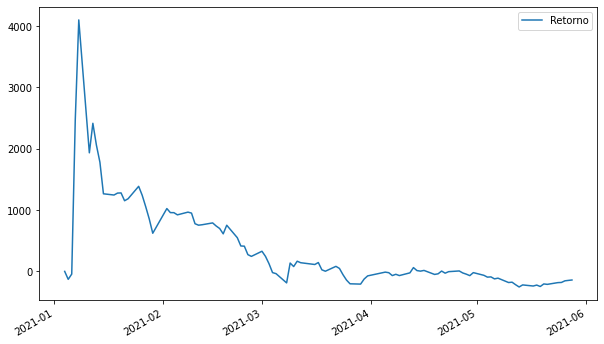

In [ ]:
def rentabilidad(pre_act,p_opt):
  rent=[]
  riesgo=[]
  shape_r=[]
  indice = 1
  com=pre_act.index[0]
  for i in pre_act.index:
    rent_dia= pre_act[pre_act.index==i].reset_index()-pre_act[pre_act.index==com].reset_index()
    rent.append(dot(rent_dia.drop(['index'],axis=1),p_opt)*100/indice)
    indice+=1
  print(rent)
  renta=pd.DataFrame(array(rent),index=pre_act.index,columns=['Retorno'])
  renta.plot(figsize=(10,6))

print(pre_act)
print(rentabilidad(pre_act,p_opt))


#Filtro de top n rendimientos

In [ ]:
mej_emisoras=top(base,10)
Num_emi=len(mej_emisoras)
me_rend=rend[mej_emisoras]

#Restricciones del modelo
cons = {'type': 'eq', 'fun': lambda phi: sum(phi) - 1}
#Restricción de pesos, valores positivos y menores que 1
lim=[(0,1)]*Num_emi
#Pesos óptimos
p_opt = minimize(lambda pesos: -shape_port(me_rend, pesos),
                  Num_emi* [1 / Num_emi],
                  bounds=lim,
                  constraints=cons)['x']
print(p_opt)
print(ret_port(me_rend,p_opt))
print(ries_port(me_rend,p_opt))
print(shape_port(me_rend,p_opt))

[7.92412223e-02 7.69136363e-02 1.03234088e-01 1.39750707e-01
 4.43728138e-02 3.02741296e-02 1.08696402e-01 3.64584046e-01
 3.73243374e-16 5.29329551e-02]
1.146891831696234
0.17814395674644454
6.438005827661196


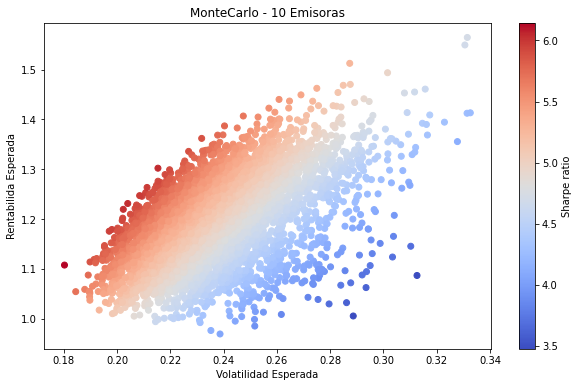

In [ ]:
#MonteCarlo
n=5000
rend_ries_port,shape_p = MonteCarlo(me_rend,n)
MC_grafica(rend_ries_port,shape_p,Num_emi)

                 TSLA.MX      FCX.MX  ...        X.MX       AMD.MX
2021-01-04  14600.500000  542.400208  ...  342.373230  1830.250000
2021-01-05  14579.700195  563.437866  ...  364.622131  1813.670044
2021-01-06  14873.099609  594.934387  ...  415.689606  1781.000000
2021-01-07  16293.000000  625.930969  ...  409.979889  1913.000000
2021-01-08  17513.199219  620.761536  ...  443.798248  1889.400024
...                  ...         ...  ...         ...          ...
2021-05-24  12087.099609  823.030029  ...  484.109985  1541.430054
2021-05-25  11987.500000  814.989990  ...  469.899994  1540.609985
2021-05-26  12340.000000  822.000000  ...  490.299988  1554.010010
2021-05-27  12389.700195  849.989990  ...  518.700012  1558.089966
2021-05-28  12456.799805  851.000000  ...  516.409973  1596.790039

[101 rows x 10 columns]
[array([0.]), array([-468.15433757]), array([-346.23323452]), array([3229.20485371]), array([5837.47132029]), array([2640.99647346]), array([3403.56187801]), array([2879.9

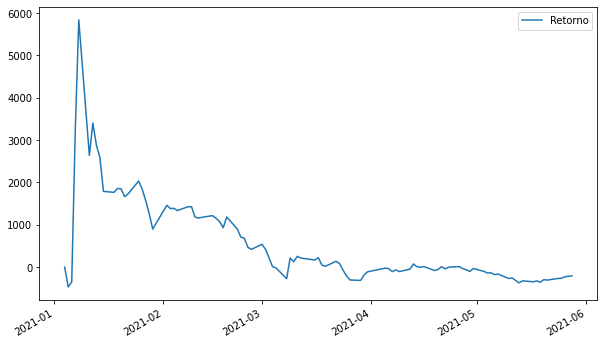

In [ ]:
print(pre_act[mej_emisoras])
rentabilidad(pre_act[mej_emisoras],p_opt)

In [ ]:
#Emisoras y pesos del portafolio
list(zip(mej_emisoras,p_opt))

[('TSLA.MX', 0.07924122231744961),
 ('FCX.MX', 0.07691363626086074),
 ('VOLARA.MX', 0.10323408834950215),
 ('GMEXICOB.MX', 0.13975070693612415),
 ('CEMEXCPO.MX', 0.04437281378511226),
 ('PE&OLES.MX', 0.03027412961401665),
 ('BIDUN.MX', 0.10869640210082322),
 ('LACOMERUBC.MX', 0.3645840455478468),
 ('X.MX', 3.7324337414171294e-16),
 ('AMD.MX', 0.052932955088263844)]